In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
df= pd.read_csv("../Datasets/Global_world.csv")

In [42]:
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


## Data Preparation

In [43]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [44]:
df.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [45]:
df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [46]:
df=df.rename(columns={'Density\n(P/Km2)':'Density_people_persqkm','Agricultural Land( %)':'Agricultural_Land_pct','Land Area(Km2)':'Land_Area_sqkm',
                      'Armed Forces size':'Armed_Forces_size','Birth Rate':'Birth_Rate','Calling Code':'Calling_Code','Capital/Major City':'Capital_Major_City',
                      'CPI Change (%)':'CPI_Change_pct','Fertility Rate':'Fertility_Rate','Forested Area (%)':'Forested_Area_pct','Gasoline Price':'Gasoline_Price',
                      'Gross primary education enrollment (%)':'Gross_primary_education_enrollment_pct','Gross tertiary education enrollment (%)':'Gross_tertiary_education_enrollment_pct',
                      'Infant mortality':'Infant_mortality','Largest city':'Largest_city','Life expectancy':'Life_expectancy','Maternal mortality ratio':'Maternal_mortality_ratio',
                      'Minimum wage':'Minimum_wage','Official language':'Official_language','Out of pocket health expenditure':'Out_of_pocket_health_expenditure',
                      'Physicians per thousand':'Physicians_per_thousand','Population: Labor force participation (%)':'Population_Labor_force_participation_pct','Tax revenue (%)':'Tax_revenue_pct',
                      'Total tax rate':'Total_tax_rate','Unemployment rate':'Unemployment_rate','Co2-Emissions':'Co2_Emissions','Currency-Code':'Currency_Code'})

In [47]:
df.columns

Index(['Country', 'Density_people_persqkm', 'Abbreviation',
       'Agricultural_Land_pct', 'Land_Area_sqkm', 'Armed_Forces_size',
       'Birth_Rate', 'Calling_Code', 'Capital_Major_City', 'Co2_Emissions',
       'CPI', 'CPI_Change_pct', 'Currency_Code', 'Fertility_Rate',
       'Forested_Area_pct', 'Gasoline_Price', 'GDP',
       'Gross_primary_education_enrollment_pct',
       'Gross_tertiary_education_enrollment_pct', 'Infant_mortality',
       'Largest_city', 'Life_expectancy', 'Maternal_mortality_ratio',
       'Minimum_wage', 'Official_language', 'Out_of_pocket_health_expenditure',
       'Physicians_per_thousand', 'Population',
       'Population_Labor_force_participation_pct', 'Tax_revenue_pct',
       'Total_tax_rate', 'Unemployment_rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [48]:
df.Density_people_persqkm.unique()

array(['60', '105', '18', '164', '26', '223', '17', '104', '3', '109',
       '123', '39', '2,239', '1,265', '668', '47', '383', '108', '20',
       '11', '64', '4', '25', '83', '76', '463', '138', '95', '56', '8',
       '13', '153', '46', '467', '16', '100', '73', '106', '131', '139',
       '40', '137', '43', '96', '225', '71', '103', '313', '50', '35',
       '31', '67', '115', '49', '119', '9', '239', '57', '240', '81',
       '331', '167', '53', '70', '414', '2,003', '89', '107', '464',
       '151', '52', '93', '72', '400', '206', '273', '347', '7', '94',
       '147', '34', '32', '30', '667', '238', '242', '48', '203', '99',
       '1,802', '1,380', '329', '5', '626', '66', '784', '26,337', '2',
       '541', '508', '55', '19', '226', '214', '15', '287', '847', '58',
       '368', '124', '111', '248', '84', '525', '205', '301', '284',
       '566', '228', '87', '8,358', '114', '527', '341', '219', '68',
       '152', '110', '393', '229', '75', '118', '281', '36', '79', '314',
 

In [55]:
df.Density_people_persqkm=df.Density_people_persqkm.replace('[,]','',regex=True).astype('float64')

In [56]:
df.Abbreviation=df.Abbreviation.fillna('unknown')

In [57]:
df.Agricultural_Land_pct=df.Agricultural_Land_pct.fillna(0)

In [58]:
df.Agricultural_Land_pct.unique()

array([58.1, 43.1, 17.4, 40. , 47.5, 20.5, 54.3, 58.9, 48.2, 32.4, 57.7,
        1.4, 11.1, 70.6, 23.3, 42. , 44.6,  7. , 33.3, 13.6, 34.8, 45.6,
       33.9,  2.7, 46.3, 44.2, 79.2, 64.8, 19.6, 30.9, 20.6,  6.9,  8.2,
       39.7, 21.2, 56.2, 40.3, 71.5, 31.1, 34.5, 27.6, 59.9, 12.2, 45.2,
       11.6, 62. , 73.4, 48.7, 22.2,  3.8, 76.4, 10.1, 75.2, 23.1,  0. ,
       36.3,  7.5, 52.4, 20. , 59.8, 47.7, 69. , 47.6, 23.5, 36. , 59. ,
       58. ,  8.6, 66.8, 28.9, 58.4, 18.7, 60.4, 31.5, 28.2, 21.4, 64.5,
       24.6, 43.2, 41. , 12.3, 12. , 80.4, 48.5,  8.4, 55. , 10.3, 64.3,
       77.6, 28. ,  8.7, 32.2, 47.2, 53.7, 71.2, 61.4, 26.3, 33.8, 63.9,
       38.5, 42.4, 54.6, 31.4, 74.2, 19. , 68.5, 63.5, 19.5, 47.1, 28.7,
       53.3, 40.5, 42.1, 36.1, 77.7, 21.8,  4.6, 47.8, 10.9, 30.4,  2.6,
       55.1, 18.5, 41.7, 46.9, 39.5,  5.8, 58.8, 13.3, 25.6, 12.4, 16.7,
       50.7, 80.8, 46.1, 39.3,  3.4, 54.7,  0.9, 39.2, 30.7,  3.9, 70.3,
       79.8, 52.6, 43.7,  0.6,  7.4, 38.4, 75.8, 34

In [59]:
df.Agricultural_Land_pct=df.Agricultural_Land_pct.replace('[%]','',regex=True).astype('float64')

In [60]:
df.Land_Area_sqkm=df.Land_Area_sqkm.fillna(0)
df.Armed_Forces_size=df.Armed_Forces_size.fillna(0)
df.Birth_Rate=df.Birth_Rate.fillna(0)
df.Calling_Code=df.Calling_Code.fillna(0)
df.Capital_Major_City=df.Capital_Major_City.fillna('unknown')
df.Co2_Emissions=df.Co2_Emissions.fillna(0)
df.CPI=df.CPI.fillna(0)
df.CPI_Change_pct=df.CPI_Change_pct.fillna(0)
df.Currency_Code=df.Currency_Code.fillna('unknown')
df.Fertility_Rate=df.Fertility_Rate.fillna(0)
df.Forested_Area_pct=df.Forested_Area_pct.fillna(0)
df.Gasoline_Price=df.Gasoline_Price.fillna(0)
df.GDP=df.GDP.fillna(0)
df.Gross_primary_education_enrollment_pct=df.Gross_primary_education_enrollment_pct.fillna(0)
df.Gross_tertiary_education_enrollment_pct=df.Gross_tertiary_education_enrollment_pct.fillna(0)
df.Infant_mortality=df.Infant_mortality.fillna(0)
df.Largest_city=df.Largest_city.fillna('unknown')
df.Life_expectancy=df.Life_expectancy.fillna(0)
df.Maternal_mortality_ratio=df.Maternal_mortality_ratio.fillna(0)
df.Minimum_wage=df.Minimum_wage.fillna(0)
df.Official_language=df.Official_language.fillna('unknown')
df.Out_of_pocket_health_expenditure=df.Out_of_pocket_health_expenditure.fillna(0)
df.Physicians_per_thousand=df.Physicians_per_thousand.fillna(0)
df.Population=df.Population.fillna(0)
df.Population_Labor_force_participation_pct=df.Population_Labor_force_participation_pct.fillna(0)
df.Tax_revenue_pct=df.Tax_revenue_pct.fillna(0)
df.Total_tax_rate=df.Total_tax_rate.fillna(0)
df.Unemployment_rate=df.Unemployment_rate.fillna(0)
df.Urban_population=df.Urban_population.fillna(0)
df.Latitude=df.Latitude.fillna(0)
df.Longitude=df.Longitude.fillna(0)

In [61]:
df.isnull().sum()

Country                                     0
Density_people_persqkm                      0
Abbreviation                                0
Agricultural_Land_pct                       0
Land_Area_sqkm                              0
Armed_Forces_size                           0
Birth_Rate                                  0
Calling_Code                                0
Capital_Major_City                          0
Co2_Emissions                               0
CPI                                         0
CPI_Change_pct                              0
Currency_Code                               0
Fertility_Rate                              0
Forested_Area_pct                           0
Gasoline_Price                              0
GDP                                         0
Gross_primary_education_enrollment_pct      0
Gross_tertiary_education_enrollment_pct     0
Infant_mortality                            0
Largest_city                                0
Life_expectancy                   

In [63]:
df.Land_Area_sqkm=df.Land_Area_sqkm.replace('[,]','',regex=True).astype('float64')
df.Armed_Forces_size=df.Armed_Forces_size.replace('[,]','',regex=True).astype('float64')
df.Co2_Emissions=df.Co2_Emissions.replace('[,]','',regex=True).astype('float64')
df.CPI=df.CPI.replace('[%,]','',regex=True).astype('float64')
df.CPI_Change_pct=df.CPI_Change_pct.replace('[%]','',regex=True).astype('float64')
df.Forested_Area_pct=df.Forested_Area_pct.replace('[%]','',regex=True).astype('float64')
df.Gasoline_Price=df.Gasoline_Price.replace('[$]','',regex=True).astype('float64')
df.GDP=df.GDP.replace('[$,]','',regex=True).astype('float64')
df.Gross_primary_education_enrollment_pct=df.Gross_primary_education_enrollment_pct.replace('[%]','',regex=True).astype('float64')
df.Gross_tertiary_education_enrollment_pct=df.Gross_tertiary_education_enrollment_pct.replace('[%]','',regex=True).astype('float64')
df.Minimum_wage=df.Minimum_wage.replace('[$]','',regex=True).astype('float64')
df.Out_of_pocket_health_expenditure=df.Out_of_pocket_health_expenditure.replace('[%]','',regex=True).astype('float64')
df.Population=df.Population.replace('[,]','',regex=True).astype('float64')
df.Population_Labor_force_participation_pct=df.Population_Labor_force_participation_pct.replace('[%]','',regex=True).astype('float64')
df.Tax_revenue_pct=df.Tax_revenue_pct.replace('[%]','',regex=True).astype('float64')
df.Forested_Area_pct=df.Forested_Area_pct.replace('[%]','',regex=True).astype('float64')
df.Total_tax_rate=df.Total_tax_rate.replace('[%]','',regex=True).astype('float64')
df.Unemployment_rate=df.Unemployment_rate.replace('[%]','',regex=True).astype('float64')
df.Forested_Area_pct=df.Forested_Area_pct.replace('[%]','',regex=True).astype('float64')
df.Urban_population=df.Urban_population.replace('[,]','',regex=True).astype('float64')

In [64]:
df.dtypes

Country                                      object
Density_people_persqkm                      float64
Abbreviation                                 object
Agricultural_Land_pct                       float64
Land_Area_sqkm                              float64
Armed_Forces_size                           float64
Birth_Rate                                  float64
Calling_Code                                float64
Capital_Major_City                           object
Co2_Emissions                               float64
CPI                                         float64
CPI_Change_pct                              float64
Currency_Code                                object
Fertility_Rate                              float64
Forested_Area_pct                           float64
Gasoline_Price                              float64
GDP                                         float64
Gross_primary_education_enrollment_pct      float64
Gross_tertiary_education_enrollment_pct     float64
Infant_morta

In [65]:
df

,Country,Density_people_persqkm,Abbreviation,Agricultural_Land_pct,Land_Area_sqkm,Armed_Forces_size,Birth_Rate,Calling_Code,Capital_Major_City,Co2_Emissions,...,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population,Population_Labor_force_participation_pct,Tax_revenue_pct,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,0.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,0.0,0.0,0.0,0.00,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,...,45.8,1.92,28515829.0,59.7,0.0,73.3,8.80,25162368.0,6.423750,-66.589730
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.0,0.0,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


## Country Analysis:

### Which countries are represented in the dataset?

In [66]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Ivory Coast',
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemal

### What is the frequency distribution of countries across various metrics?

In [67]:
df.Country.value_counts()

Country
Afghanistan      1
Saint Lucia      1
Nicaragua        1
Niger            1
Nigeria          1
                ..
Grenada          1
Guatemala        1
Guinea           1
Guinea-Bissau    1
Zimbabwe         1
Name: count, Length: 195, dtype: int64

In [68]:
df.describe()

,Density_people_persqkm,Agricultural_Land_pct,Land_Area_sqkm,Armed_Forces_size,Birth_Rate,Calling_Code,Co2_Emissions,CPI,CPI_Change_pct,Fertility_Rate,...,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population,Population_Labor_force_participation_pct,Tax_revenue_pct,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude
count,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,...,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000
mean,356.764103,37.713333,6.860878e+05,1.396718e+05,19.592974,358.697436,1.714167e+05,173.856667,6.170769,2.601282,...,31.465641,1.773795,3.917921e+07,56.625128,14.364103,38.310256,6.215385,2.173263e+07,18.994442,20.128678
std,1982.888967,22.596702,1.917286e+06,3.601490e+05,10.397534,323.434462,8.241858e+05,383.909718,23.493382,1.355777,...,19.783417,1.688826,1.447454e+08,21.152722,8.595080,22.208406,5.240580,7.453597e+07,23.939018,66.559711
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-4.300000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-40.900557,-175.198242
25%,35.500000,19.800000,2.308300e+04,4.500000e+03,10.675000,81.500000,1.901500e+03,111.005000,0.650000,1.625000,...,15.700000,0.245000,1.916856e+06,52.900000,9.500000,28.500000,2.555000,9.504180e+05,4.372880,-7.658537
50%,89.000000,39.200000,1.184840e+05,2.300000e+04,17.800000,255.000000,1.071500e+04,121.640000,2.100000,2.200000,...,28.400000,1.300000,8.776109e+06,61.600000,14.700000,36.600000,4.670000,4.359150e+06,17.189877,20.939444
75%,216.500000,54.850000,5.205440e+05,1.230000e+05,28.445000,506.500000,6.194100e+04,155.605000,3.750000,3.565000,...,43.750000,2.875000,2.856227e+07,68.300000,20.300000,47.300000,8.840000,1.460139e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,...,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


## Population Density:

### What is the range of population density values across countries?

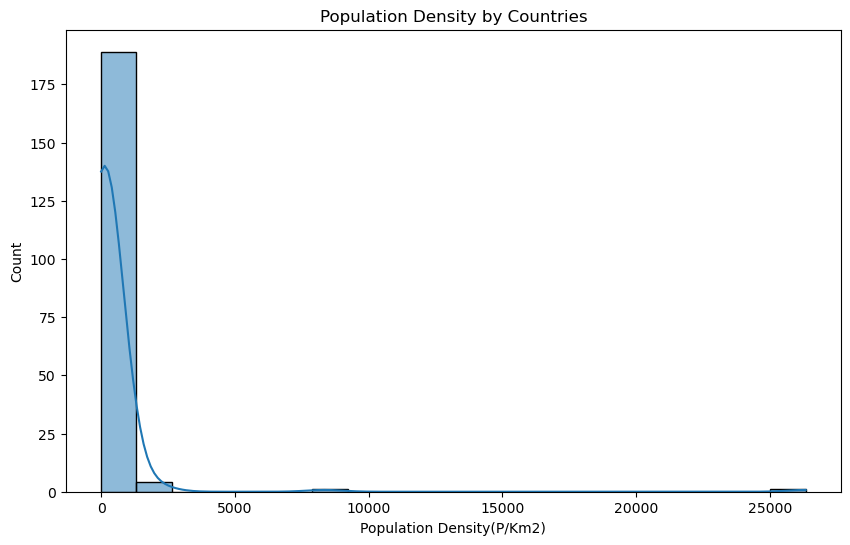

In [105]:
plt.figure(figsize=(10,6))
sb.histplot(df.Density_people_persqkm,bins=20,kde=True)
plt.title("Population Density by Countries")
plt.xlabel("Population Density(P/Km2)")
plt.show()

### Are there any countries with exceptionally high or low population densities?

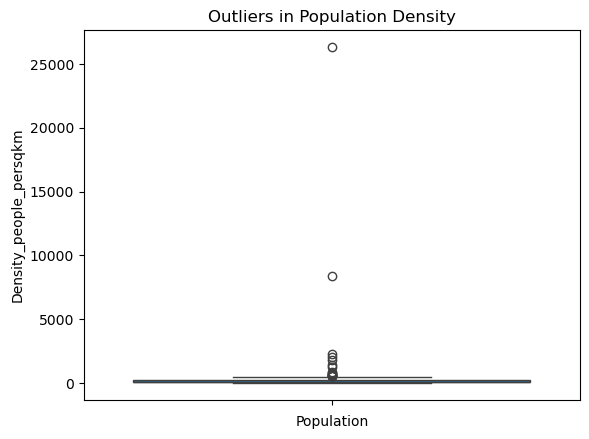

In [70]:
sb.boxplot(df.Density_people_persqkm)
plt.title("Outliers in Population Density")
plt.xlabel("Population")
plt.show()

In [71]:
high_population_density = df.groupby('Country')['Density_people_persqkm'].max().nlargest(5)

print("Top 5 Countries with the Highest Population Density:")
print(high_population_density)

Top 5 Countries with the Highest Population Density:
Country
Monaco          26337.0
Singapore        8358.0
Bahrain          2239.0
Vatican City     2003.0
Maldives         1802.0
Name: Density_people_persqkm, dtype: float64


In [72]:
low_population_density = df.groupby('Country')['Density_people_persqkm'].min().nsmallest(5)

print("Top 5 Countries with the Lowest Population Density:")
print(low_population_density)

Top 5 Countries with the Lowest Population Density:
Country
Mongolia     2.0
Australia    3.0
Iceland      3.0
Namibia      3.0
Botswana     4.0
Name: Density_people_persqkm, dtype: float64


## Country Abbreviations:

### What abbreviations are used for different countries?

In [73]:
df[['Country', 'Abbreviation']].values.tolist()

[['Afghanistan', 'AF'],
 ['Albania', 'AL'],
 ['Algeria', 'DZ'],
 ['Andorra', 'AD'],
 ['Angola', 'AO'],
 ['Antigua and Barbuda', 'AG'],
 ['Argentina', 'AR'],
 ['Armenia', 'AM'],
 ['Australia', 'AU'],
 ['Austria', 'AT'],
 ['Azerbaijan', 'AZ'],
 ['The Bahamas', 'BS'],
 ['Bahrain', 'BH'],
 ['Bangladesh', 'BD'],
 ['Barbados', 'BB'],
 ['Belarus', 'BY'],
 ['Belgium', 'BE'],
 ['Belize', 'BZ'],
 ['Benin', 'BJ'],
 ['Bhutan', 'BT'],
 ['Bolivia', 'BO'],
 ['Bosnia and Herzegovina', 'BA'],
 ['Botswana', 'BW'],
 ['Brazil', 'BR'],
 ['Brunei', 'BN'],
 ['Bulgaria', 'BG'],
 ['Burkina Faso', 'BF'],
 ['Burundi', 'BI'],
 ['Ivory Coast', 'CI'],
 ['Cape Verde', 'CV'],
 ['Cambodia', 'KH'],
 ['Cameroon', 'CM'],
 ['Canada', 'CA'],
 ['Central African Republic', 'CF'],
 ['Chad', 'TD'],
 ['Chile', 'CL'],
 ['China', 'CN'],
 ['Colombia', 'CO'],
 ['Comoros', 'KM'],
 ['Republic of the Congo', 'unknown'],
 ['Costa Rica', 'CR'],
 ['Croatia', 'HR'],
 ['Cuba', 'CU'],
 ['Cyprus', 'CY'],
 ['Czech Republic', 'CZ'],
 ['Democra

## Agricultural Land:

### What is the distribution of agricultural land as a percentage of total land area?

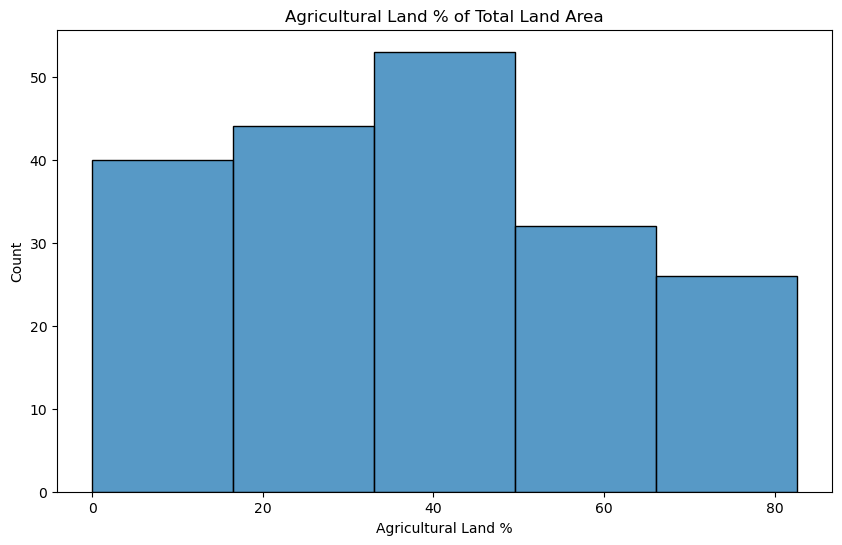

In [106]:
plt.figure(figsize=(10,6))
sb.histplot(df.Agricultural_Land_pct,bins=5)
plt.title("Agricultural Land % of Total Land Area")
plt.xlabel("Agricultural Land %")
plt.show()

### Are there correlations between agricultural land percentage and variables like population density or CO2 emissions?

In [75]:
Corr_Agricultural_Land=df[['Agricultural_Land_pct','Density_people_persqkm','Co2_Emissions']].corr()
Corr_Agricultural_Land

,Agricultural_Land_pct,Density_people_persqkm,Co2_Emissions
Agricultural_Land_pct,1.000000,-0.156662,0.071776
Density_people_persqkm,-0.156662,1.000000,-0.020301
Co2_Emissions,0.071776,-0.020301,1.000000


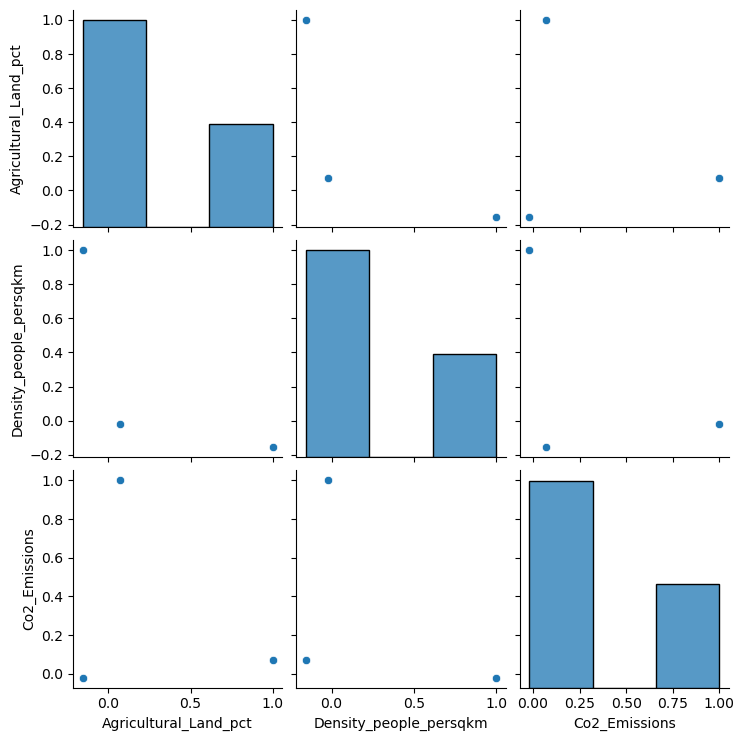

In [78]:
sb.pairplot(Corr_Agricultural_Land)
plt.show()

In [99]:
max_agricultural_land = df.groupby('Country')['Agricultural_Land_pct'].max().nlargest(5)
min_agricultural_land =  df[df['Agricultural_Land_pct'] != 0].groupby('Country')['Agricultural_Land_pct'].min().nsmallest(5)

print("Top 5 Countries with the Highest Agricultural Land Percentage:")
print(max_agricultural_land)

print("\nTop 5 Countries with the Lowest Agricultural Land Percentage:")
print(min_agricultural_land)

Top 5 Countries with the Highest Agricultural Land Percentage:
Country
Uruguay         82.6
Saudi Arabia    80.8
Kazakhstan      80.4
South Africa    79.8
Burundi         79.2
Name: Agricultural_Land_pct, dtype: float64

Top 5 Countries with the Lowest Agricultural Land Percentage:
Country
Suriname            0.6
Singapore           0.9
The Bahamas         1.4
Papua New Guinea    2.6
Brunei              2.7
Name: Agricultural_Land_pct, dtype: float64


## Land Area:

### What is the range of land areas for different countries?

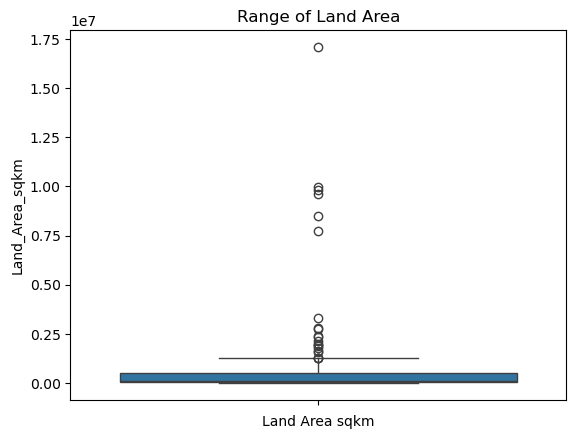

In [30]:
sb.boxplot(df.Land_Area_sqkm)
plt.title("Range of Land Area")
plt.xlabel("Land Area sqkm")
plt.show()

### Is there a correlation between land area and population density?

In [73]:
Corr_Land_Area=df[['Land_Area_sqkm','Density_people_persqkm']].corr()
Corr_Land_Area

,Land_Area_sqkm,Density_people_persqkm
Land_Area_sqkm,1.000000,-0.053711
Density_people_persqkm,-0.053711,1.000000


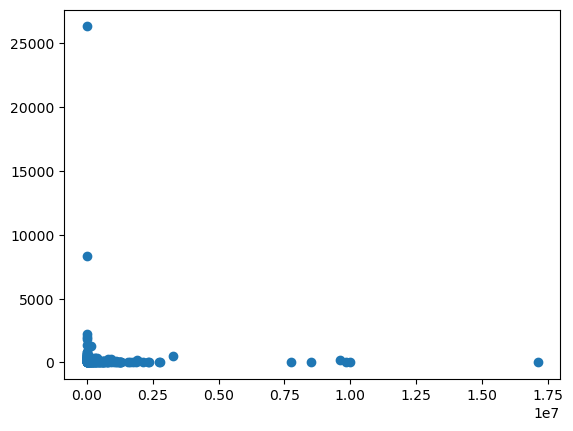

In [75]:
plt.scatter(df.Land_Area_sqkm,df.Density_people_persqkm)
plt.show()

In [100]:
max_land=df.groupby('Country')['Land_Area_sqkm'].max().nlargest(5)
min_land= df[df['Land_Area_sqkm'] != 0].groupby('Country')['Land_Area_sqkm'].min().nsmallest(5)

print("Top 5 Countries with the Largest Land Areas:")
print(max_land)

print("\nTop 5 Countries with the Smallest Land Areas:")
print(min_land)
# print(df.Land_Area_Km2.mean())

Top 5 Countries with the Largest Land Areas:
Country
Russia           17098240.0
Canada            9984670.0
United States     9833517.0
China             9596960.0
Brazil            8515770.0
Name: Land_Area_sqkm, dtype: float64

Top 5 Countries with the Smallest Land Areas:
Country
Monaco             2.0
Nauru             21.0
Tuvalu            26.0
San Marino        61.0
Liechtenstein    160.0
Name: Land_Area_sqkm, dtype: float64


## Armed Forces:

### What is the distribution of armed forces sizes across countries?

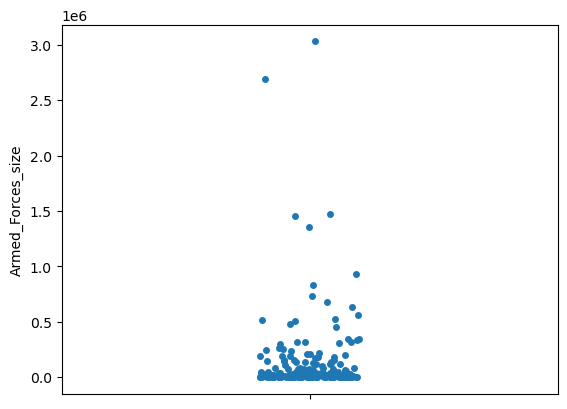

In [76]:
sb.stripplot(df.Armed_Forces_size)
plt.show()

### Are there correlations between armed forces size and other variables, such as population or land area?

In [77]:
Corr_Armed_Forces=df[['Armed_Forces_size','Population','Land_Area_sqkm']].corr()
Corr_Armed_Forces

,Armed_Forces_size,Population,Land_Area_sqkm
Armed_Forces_size,1.000000,0.87685,0.560414
Population,0.876850,1.00000,0.446990
Land_Area_sqkm,0.560414,0.44699,1.000000


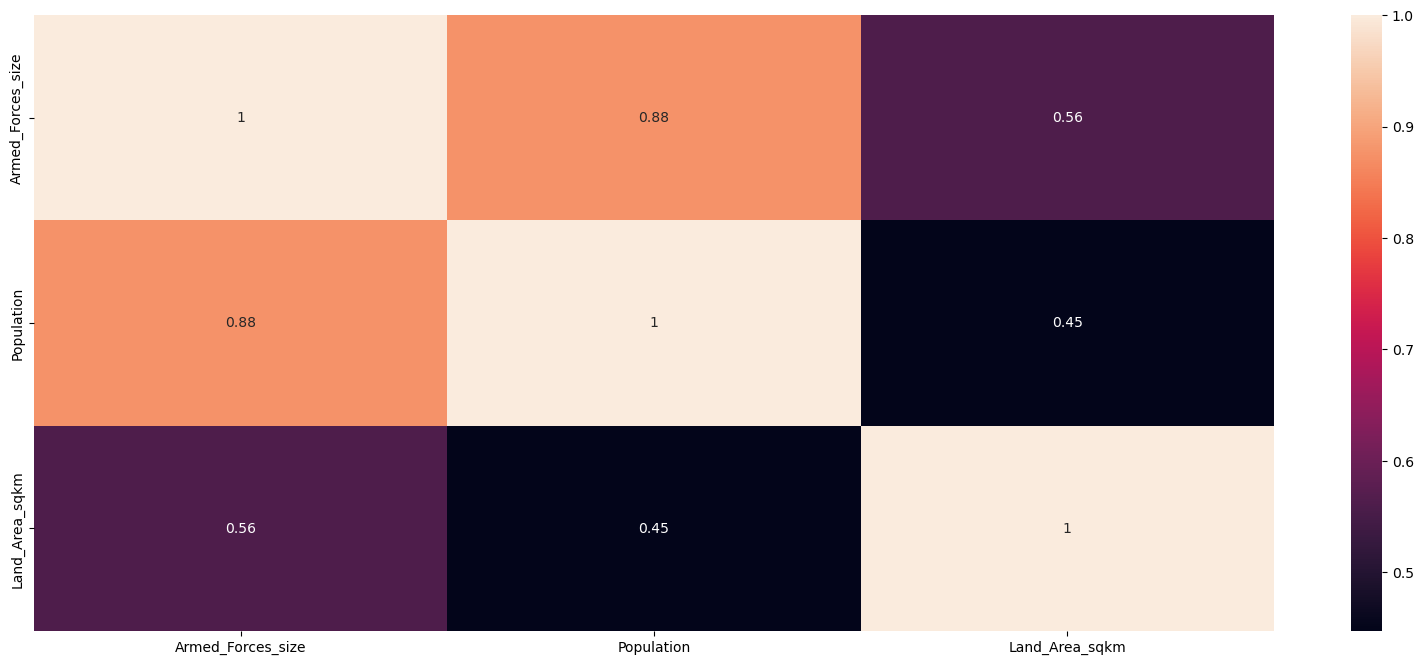

In [79]:
plt.figure(figsize=(20,8))
sb.heatmap(Corr_Armed_Forces,annot=True)
plt.show()

In [101]:
max_army = df.groupby('Country')['Armed_Forces_size'].max().nlargest(5)
min_army =  df[df['Armed_Forces_size'] != 0].groupby('Country')['Armed_Forces_size'].min().nsmallest(5)

print("Top 5 Countries with the Largest Armed Forces:")
print(max_army)

print("\nTop 5 Countries with the Smallest Armed Forces:")
print(min_army)

Top 5 Countries with the Largest Armed Forces:
Country
India            3031000.0
China            2695000.0
North Korea      1469000.0
Russia           1454000.0
United States    1359000.0
Name: Armed_Forces_size, dtype: float64

Top 5 Countries with the Smallest Armed Forces:
Country
Barbados             1000.0
Cape Verde           1000.0
Equatorial Guinea    1000.0
S�����������         1000.0
The Bahamas          1000.0
Name: Armed_Forces_size, dtype: float64


## Birth Rate:

### What is the range of birth rates across countries?

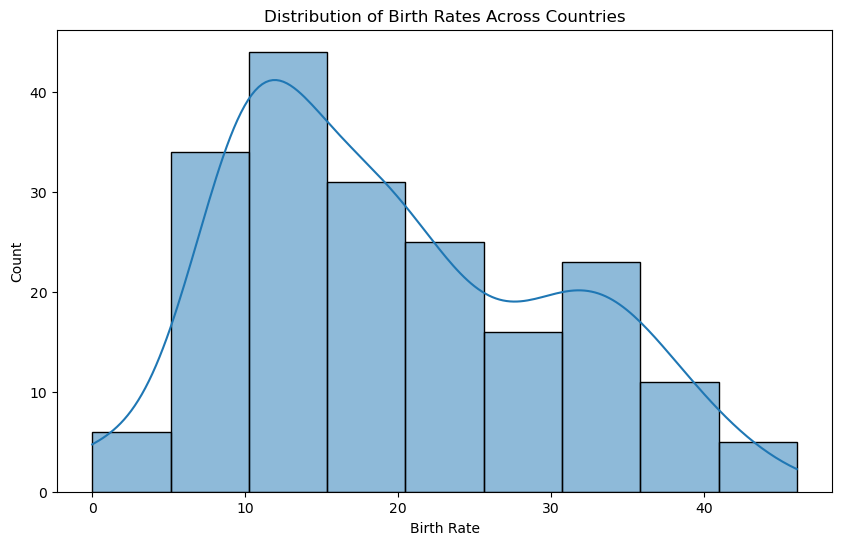

In [107]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Birth_Rate'], kde=True)
plt.title("Distribution of Birth Rates Across Countries")
plt.xlabel("Birth Rate")
plt.show()

### Are there correlations between birth rate and other variables like GDP or population density?

In [82]:
Corr_Birth_Rate=df[['Birth_Rate','Density_people_persqkm','GDP']].corr()
Corr_Birth_Rate

,Birth_Rate,Density_people_persqkm,GDP
Birth_Rate,1.000000,-0.147221,-0.157436
Density_people_persqkm,-0.147221,1.000000,-0.018878
GDP,-0.157436,-0.018878,1.000000


In [102]:
max_birth_rate = df.groupby('Country')['Birth_Rate'].max().nlargest(5)
min_birth_rate =  df[df['Birth_Rate'] != 0].groupby('Country')['Birth_Rate'].min().nsmallest(5)

print("Top 5 Countries with the Highest Birth Rates:")
print(max_birth_rate)

print("\nTop 5 Countries with the Lowest Birth Rates:")
print(min_birth_rate)

Top 5 Countries with the Highest Birth Rates:
Country
Niger                               46.08
Chad                                42.17
Somalia                             41.75
Mali                                41.54
Democratic Republic of the Congo    41.18
Name: Birth_Rate, dtype: float64

Top 5 Countries with the Lowest Birth Rates:
Country
Monaco         5.9
South Korea    6.4
San Marino     6.8
Andorra        7.2
Italy          7.3
Name: Birth_Rate, dtype: float64


## Calling Codes:

### What are the calling codes for different countries?

In [84]:
Calling_Code=df[['Country','Calling_Code']]
Calling_Code

,Country,Calling_Code
0,Afghanistan,93.0
1,Albania,355.0
2,Algeria,213.0
3,Andorra,376.0
4,Angola,244.0
...,...,...
190,Venezuela,58.0
191,Vietnam,84.0
192,Yemen,967.0
193,Zambia,260.0


## Capital/Major City:

### What are the capitals or major cities for different countries?

In [40]:
df[['Country','Capital_Major_City']].values.tolist()

[['Afghanistan', 'Kabul'],
 ['Albania', 'Tirana'],
 ['Algeria', 'Algiers'],
 ['Andorra', 'Andorra la Vella'],
 ['Angola', 'Luanda'],
 ['Antigua and Barbuda', "St. John's, Saint John"],
 ['Argentina', 'Buenos Aires'],
 ['Armenia', 'Yerevan'],
 ['Australia', 'Canberra'],
 ['Austria', 'Vienna'],
 ['Azerbaijan', 'Baku'],
 ['The Bahamas', 'Nassau, Bahamas'],
 ['Bahrain', 'Manama'],
 ['Bangladesh', 'Dhaka'],
 ['Barbados', 'Bridgetown'],
 ['Belarus', 'Minsk'],
 ['Belgium', 'City of Brussels'],
 ['Belize', 'Belmopan'],
 ['Benin', 'Porto-Novo'],
 ['Bhutan', 'Thimphu'],
 ['Bolivia', 'Sucre'],
 ['Bosnia and Herzegovina', 'Sarajevo'],
 ['Botswana', 'Gaborone'],
 ['Brazil', 'Bras���'],
 ['Brunei', 'Bandar Seri Begawan'],
 ['Bulgaria', 'Sofia'],
 ['Burkina Faso', 'Ouagadougou'],
 ['Burundi', 'Bujumbura'],
 ['Ivory Coast', 'Yamoussoukro'],
 ['Cape Verde', 'Praia'],
 ['Cambodia', 'Phnom Penh'],
 ['Cameroon', 'Yaound�'],
 ['Canada', 'Ottawa'],
 ['Central African Republic', 'Bangui'],
 ['Chad', "N'Djame

## CO2 Emissions:

### What is the distribution of CO2 emissions across countries?

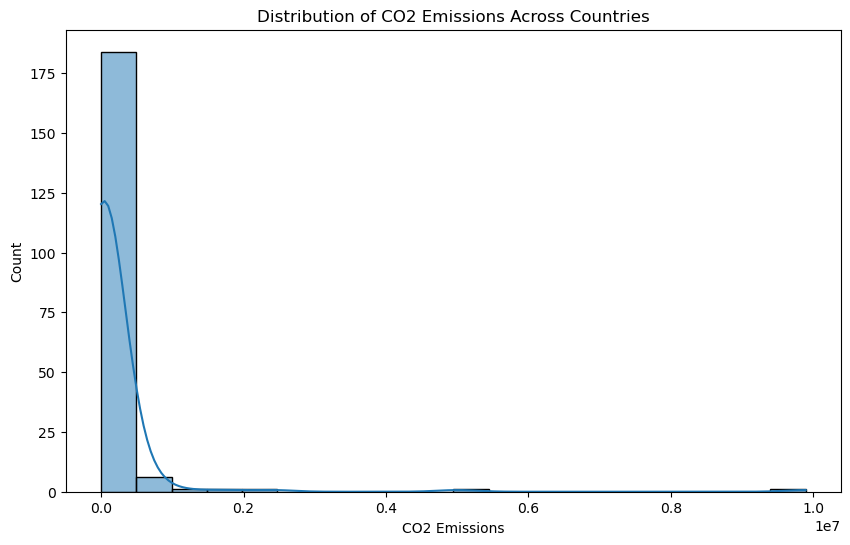

In [108]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Co2_Emissions'],bins=20,kde=True)
plt.title("Distribution of CO2 Emissions Across Countries")
plt.xlabel("CO2 Emissions")
plt.show()

### Are there correlations between CO2 emissions and variables like population size or industrial activity?

In [87]:
Corr_CO2Emissions=df[['Co2_Emissions','Urban_population']].corr()
Corr_CO2Emissions

,Co2_Emissions,Urban_population
Co2_Emissions,1.00000,0.92631
Urban_population,0.92631,1.00000


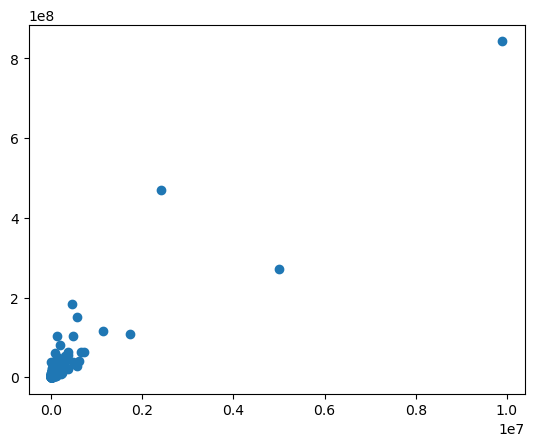

In [92]:
plt.scatter(df.Co2_Emissions,df.Urban_population)
plt.show()

In [86]:
max_co2_emissions = df.groupby('Country')['Co2_Emissions'].max().nlargest(5)
min_co2_emissions = df[df['Co2_Emissions'] != 0].groupby('Country')['Co2_Emissions'].min().nsmallest(5)

print("Top 5 Countries with the Highest CO2 Emissions:")
print(max_co2_emissions)

print("\nTop 5 Countries with the Lowest CO2 Emissions:")
print(min_co2_emissions)

Top 5 Countries with the Highest CO2 Emissions:
Country
China            9893038.0
United States    5006302.0
India            2407672.0
Russia           1732027.0
Japan            1135886.0
Name: Co2_Emissions, dtype: float64

Top 5 Countries with the Lowest CO2 Emissions:
Country
Tuvalu            11.0
Liechtenstein     51.0
Kiribati          66.0
S�����������     121.0
Tonga            128.0
Name: Co2_Emissions, dtype: float64


## Health Expenditure:

### What is the range of out-of-pocket health expenditures across countries?

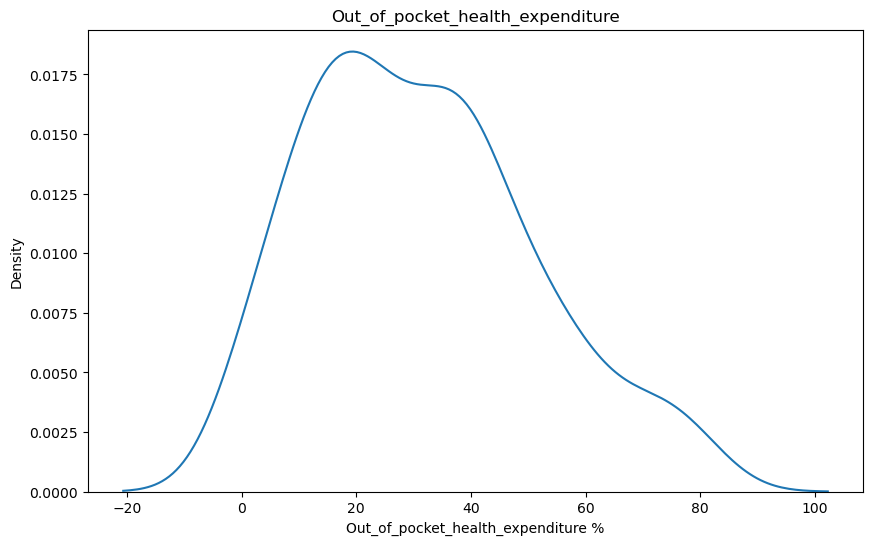

In [109]:
plt.figure(figsize=(10, 6))
sb.kdeplot(df.Out_of_pocket_health_expenditure)
plt.title("Out_of_pocket_health_expenditure")
plt.xlabel("Out_of_pocket_health_expenditure %")
plt.show()

### Is there a correlation between health expenditure and GDP or healthcare infrastructure?

In [90]:
Corr_Health_Expenditure=df[['Out_of_pocket_health_expenditure','GDP']].corr()
Corr_Health_Expenditure

,Out_of_pocket_health_expenditure,GDP
Out_of_pocket_health_expenditure,1.00000,-0.08227
GDP,-0.08227,1.00000


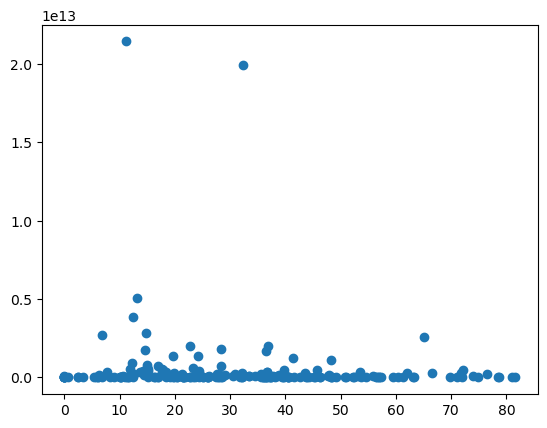

In [93]:
plt.scatter(df.Out_of_pocket_health_expenditure,df.GDP)
plt.show()

In [87]:
max_health_expenditure = df.groupby('Country')['Out_of_pocket_health_expenditure'].max().nlargest(5)
min_health_expenditure = df[df['Out_of_pocket_health_expenditure'] != 0].groupby('Country')['Out_of_pocket_health_expenditure'].min().nsmallest(5)

print("Top 5 Countries with the Highest Out-of-Pocket Health Expenditure:")
print(max_health_expenditure)

print("\nTop 5 Countries with the Lowest Out-of-Pocket Health Expenditure:")
print(min_health_expenditure)

Top 5 Countries with the Highest Out-of-Pocket Health Expenditure:
Country
Armenia        81.6
Yemen          81.0
Azerbaijan     78.6
Afghanistan    78.4
Iraq           76.5
Name: Out_of_pocket_health_expenditure, dtype: float64

Top 5 Countries with the Lowest Out-of-Pocket Health Expenditure:
Country
Kiribati                          0.2
Tuvalu                            0.7
Federated States of Micronesia    2.5
Seychelles                        2.5
Solomon Islands                   3.3
Name: Out_of_pocket_health_expenditure, dtype: float64


## Physicians per thousand:

### What is the distribution of physicians per thousand people across countries?

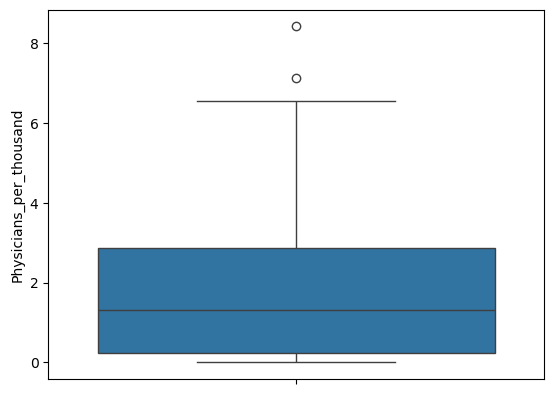

In [95]:
sb.boxplot(df.Physicians_per_thousand)
plt.show()

### Are there correlations between physician density and health outcomes or healthcare spending?

In [96]:
Corr_Physicians_perthousand=df[['Physicians_per_thousand','Life_expectancy','Infant_mortality','Out_of_pocket_health_expenditure']].corr()
Corr_Physicians_perthousand

,Physicians_per_thousand,Life_expectancy,Infant_mortality,Out_of_pocket_health_expenditure
Physicians_per_thousand,1.000000,0.348046,-0.633198,-0.165278
Life_expectancy,0.348046,1.000000,-0.247479,0.051666
Infant_mortality,-0.633198,-0.247479,1.000000,0.346629
Out_of_pocket_health_expenditure,-0.165278,0.051666,0.346629,1.000000


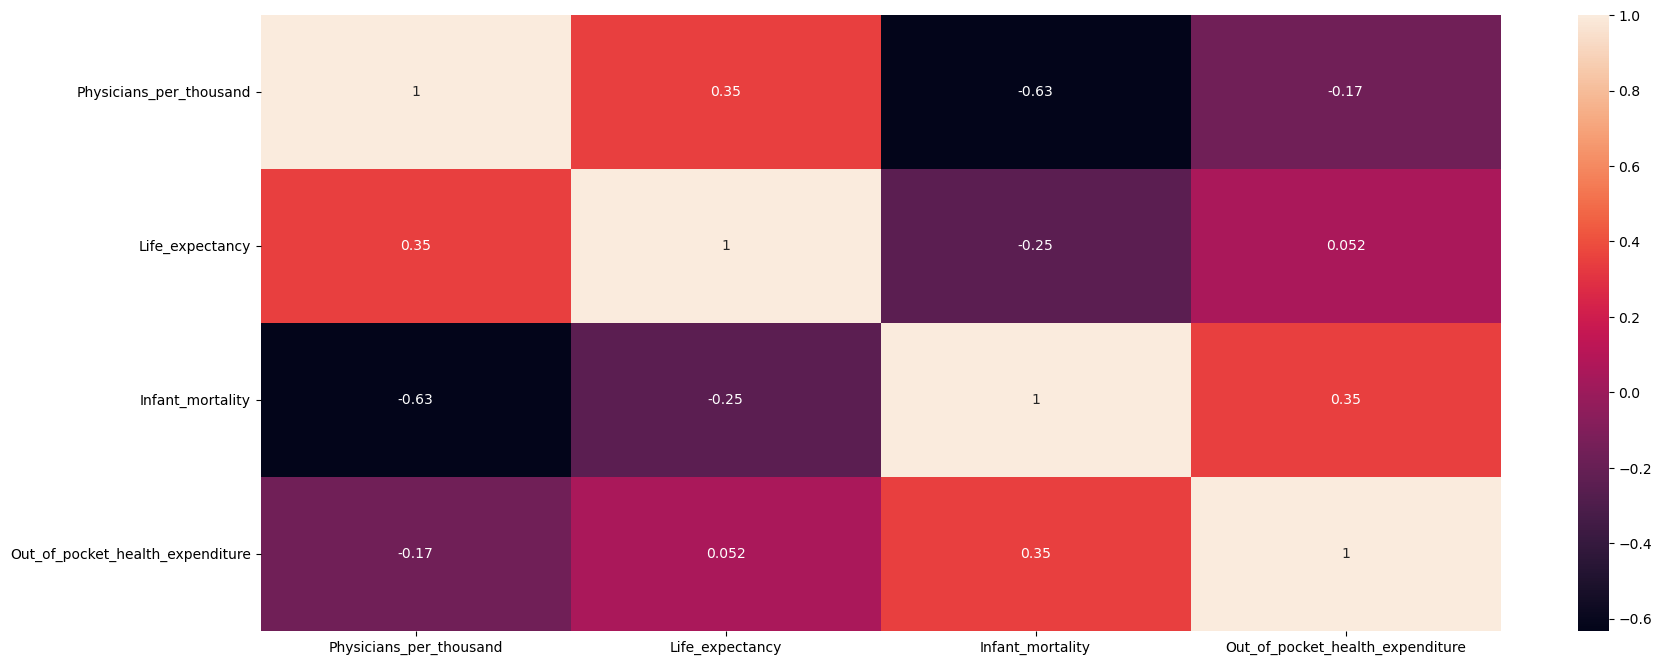

In [97]:
plt.figure(figsize=(20,8))
sb.heatmap(Corr_Physicians_perthousand,annot=True)
plt.show()

In [104]:
max_physicians = df.groupby('Country')['Physicians_per_thousand'].max().nlargest(5)
min_physicians =  df[df['Physicians_per_thousand'] != 0].groupby('Country')['Physicians_per_thousand'].min().nsmallest(5)

print("Top 5 Countries with the Highest Number of Physicians per Thousand People:")
print(max_physicians)

print("\nTop 5 Countries with the Lowest Number of Physicians per Thousand People:")
print(min_physicians)

Top 5 Countries with the Highest Number of Physicians per Thousand People:
Country
Cuba          8.42
Georgia       7.12
Monaco        6.56
Lithuania     6.35
San Marino    6.11
Name: Physicians_per_thousand, dtype: float64

Top 5 Countries with the Lowest Number of Physicians per Thousand People:
Country
Tanzania        0.01
Somalia         0.02
Sierra Leone    0.03
Chad            0.04
Liberia         0.04
Name: Physicians_per_thousand, dtype: float64


## Population:

### What is the population distribution across countries?

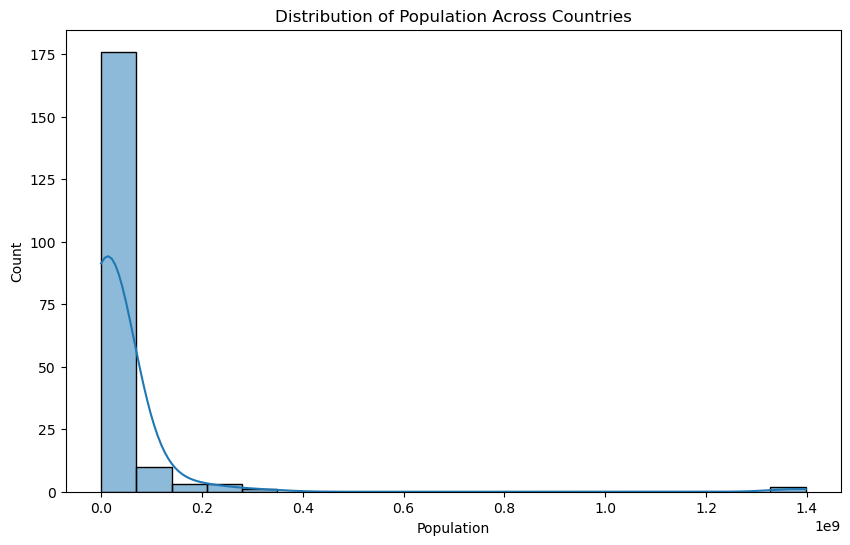

In [110]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Population'],bins=20,kde=True)
plt.title("Distribution of Population Across Countries")
plt.show()

### Are there correlations between population size and variables like land area or GDP?

In [99]:
Corr_Population=df[['Population','Life_expectancy','Land_Area_sqkm','GDP']].corr()
Corr_Population

,Population,Life_expectancy,Land_Area_sqkm,GDP
Population,1.000000,0.053514,0.446990,0.632544
Life_expectancy,0.053514,1.000000,0.090462,0.119860
Land_Area_sqkm,0.446990,0.090462,1.000000,0.550902
GDP,0.632544,0.119860,0.550902,1.000000


In [89]:
max_population = df.groupby('Country')['Population'].max().nlargest(5)
min_population =  df[df['Population'] != 0].groupby('Country')['Population'].min().nsmallest(5)

print("Top 5 Countries with the Highest Population:")
print(max_population)

print("\nTop 5 Countries with the Lowest Population:")
print(min_population)

Top 5 Countries with the Highest Population:
Country
China            1.397715e+09
India            1.366418e+09
United States    3.282395e+08
Indonesia        2.702039e+08
Pakistan         2.165653e+08
Name: Population, dtype: float64

Top 5 Countries with the Lowest Population:
Country
Vatican City      836.0
Nauru           10084.0
Tuvalu          11646.0
Palau           18233.0
San Marino      33860.0
Name: Population, dtype: float64


## Labor Force Participation:

### What is the distribution of labor force participation rates across countries?

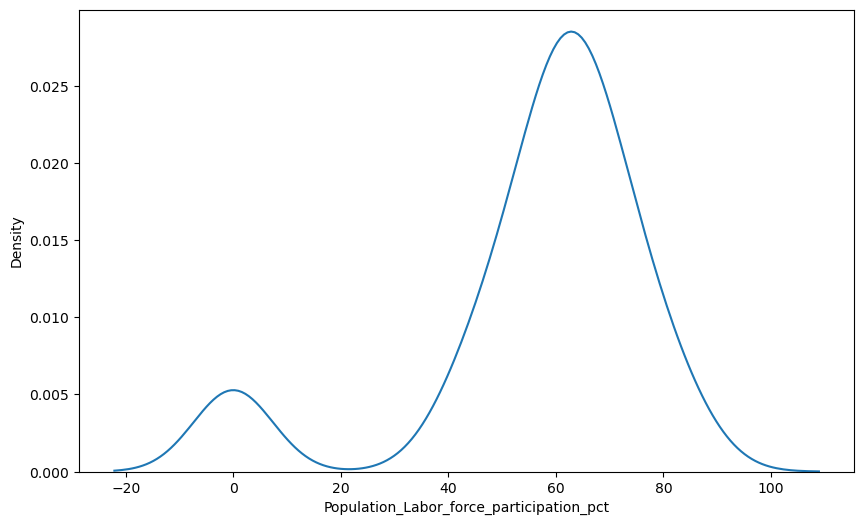

In [111]:
plt.figure(figsize=(10,6))
sb.kdeplot(df.Population_Labor_force_participation_pct)
plt.show()

### Are there correlations between labor force participation rates and economic indicators like GDP or unemployment rate?

In [101]:
Corr_Labour_Force=df[['Population_Labor_force_participation_pct','Unemployment_rate','GDP']].corr()
Corr_Labour_Force

,Population_Labor_force_participation_pct,Unemployment_rate,GDP
Population_Labor_force_participation_pct,1.000000,0.156049,0.059896
Unemployment_rate,0.156049,1.000000,0.056667
GDP,0.059896,0.056667,1.000000


In [90]:
max_labor_participation = df.groupby('Country')['Population_Labor_force_participation_pct'].max().nlargest(5)
min_labor_participation =  df[df['Population_Labor_force_participation_pct'] != 0].groupby('Country')['Population_Labor_force_participation_pct'].min().nsmallest(5)

print("Top 5 Countries with the Highest Labor Force Participation Rate:")
print(max_labor_participation)

print("\nTop 5 Countries with the Lowest Labor Force Participation Rate:")
print(min_labor_participation)

Top 5 Countries with the Highest Labor Force Participation Rate:
Country
Qatar              86.8
Madagascar         86.1
Nepal              83.8
Solomon Islands    83.8
Rwanda             83.7
Name: Population_Labor_force_participation_pct, dtype: float64

Top 5 Countries with the Lowest Labor Force Participation Rate:
Country
Yemen         38.0
Jordan        39.3
Algeria       41.2
Tajikistan    42.0
Iraq          43.0
Name: Population_Labor_force_participation_pct, dtype: float64


## Tax Revenue:

### What is the distribution of tax revenue as a percentage of GDP across countries?

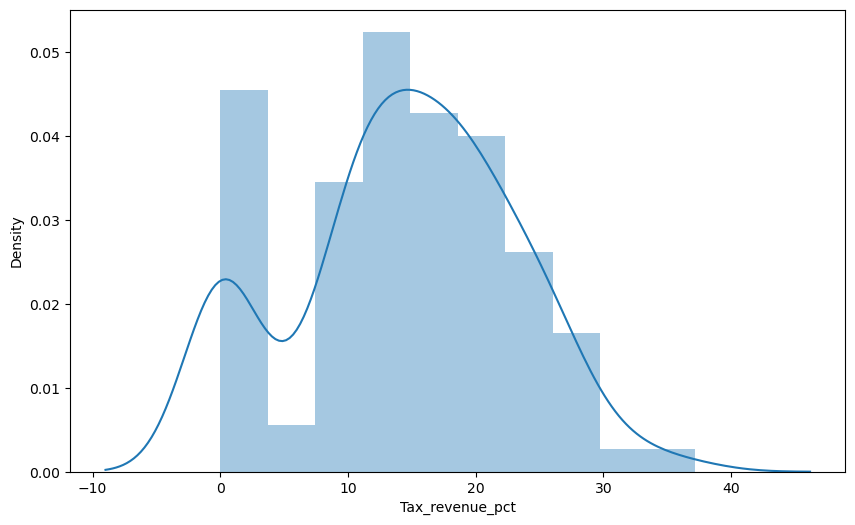

In [113]:
plt.figure(figsize=(10,6))
sb.distplot(df.Tax_revenue_pct)
plt.show()

### Are there correlations between tax revenue and economic indicators like GDP or government expenditure?

In [104]:
Corr_Tax_Revenue=df[['Tax_revenue_pct','GDP']].corr()
Corr_Tax_Revenue

,Tax_revenue_pct,GDP
Tax_revenue_pct,1.000000,-0.037143
GDP,-0.037143,1.000000


In [91]:
max_tax_revenue = df.groupby('Country')['Tax_revenue_pct'].max().nlargest(5)
min_tax_revenue =  df[df['Tax_revenue_pct'] != 0].groupby('Country')['Tax_revenue_pct'].min().nsmallest(5)

print("Top 5 Countries with the Highest Tax Revenue:")
print(max_tax_revenue)

print("\nTop 5 Countries with the Lowest Tax Revenue:")
print(min_tax_revenue)

Top 5 Countries with the Highest Tax Revenue:
Country
Algeria            37.2
Seychelles         34.1
Denmark            32.4
Lesotho            31.6
Solomon Islands    29.5
Name: Tax_revenue_pct, dtype: float64

Top 5 Countries with the Lowest Tax Revenue:
Country
United Arab Emirates    0.1
Kuwait                  1.4
Nigeria                 1.5
Iraq                    2.0
Oman                    2.5
Name: Tax_revenue_pct, dtype: float64


## Total Tax Rate:

### What is the distribution of total tax rates across countries?

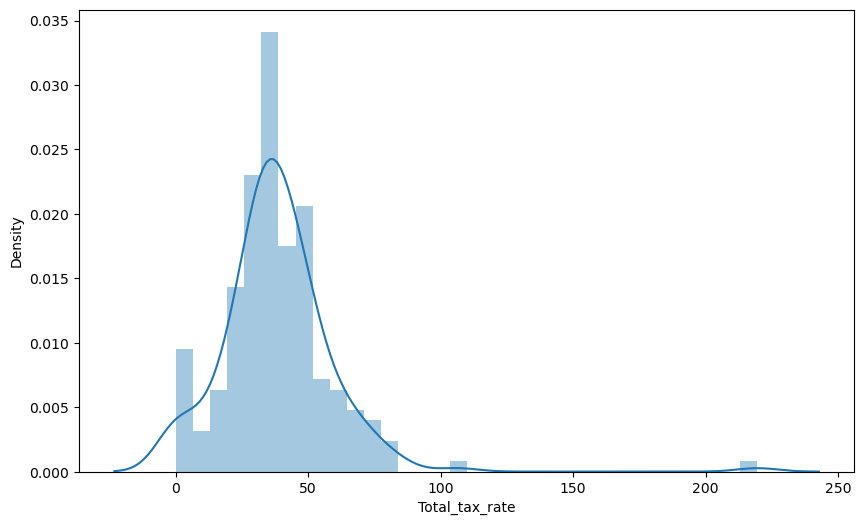

In [114]:
plt.figure(figsize=(10,6))
sb.distplot(df.Total_tax_rate)
plt.show()

### Are there correlations between total tax rates and economic indicators like GDP?

In [107]:
Corr_Total_TaxRate=df[['Total_tax_rate','GDP','Minimum_wage']].corr()
Corr_Total_TaxRate

,Total_tax_rate,GDP,Minimum_wage
Total_tax_rate,1.000000,0.069834,-0.006297
GDP,0.069834,1.000000,0.222436
Minimum_wage,-0.006297,0.222436,1.000000


In [92]:
max_total_tax_rate = df.groupby('Country')['Total_tax_rate'].max().nlargest(5)
min_total_tax_rate =  df[df['Total_tax_rate'] != 0].groupby('Country')['Total_tax_rate'].min().nsmallest(5)

print("Top 5 Countries with the Highest Total Tax Rate:")
print(max_total_tax_rate)

print("\nTop 5 Countries with the Lowest Total Tax Rate:")
print(min_total_tax_rate)

Top 5 Countries with the Highest Total Tax Rate:
Country
Comoros              219.6
Argentina            106.3
Bolivia               83.7
Eritrea               83.7
Equatorial Guinea     79.4
Name: Total_tax_rate, dtype: float64

Top 5 Countries with the Lowest Total Tax Rate:
Country
Brunei      8.0
Vanuatu     8.5
Georgia     9.9
Qatar      11.3
Kuwait     13.0
Name: Total_tax_rate, dtype: float64


## Unemployment Rate:

### What is the distribution of unemployment rates across countries?

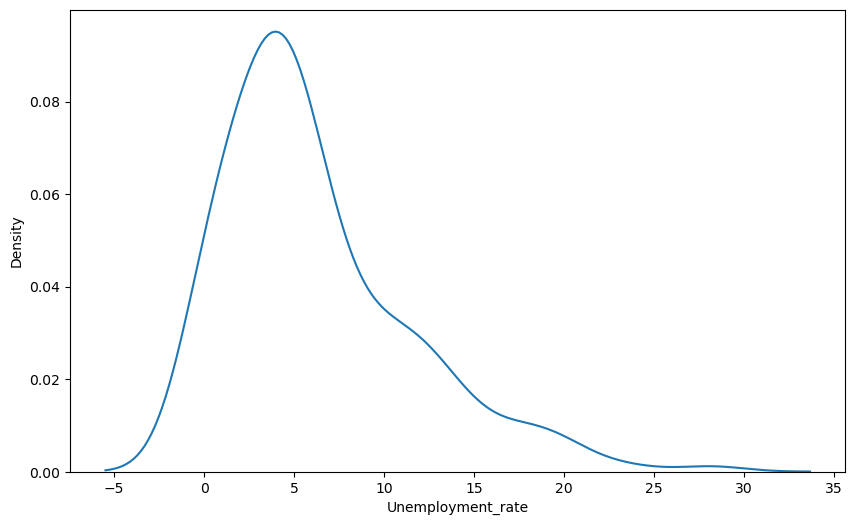

In [115]:
plt.figure(figsize=(10,6))
sb.kdeplot(df.Unemployment_rate)
plt.show()

### Are there correlations between unemployment rates and economic indicators like GDP or labor force participation rates?

In [110]:
Corr_UnemploymentRate=df[['Unemployment_rate','GDP','Minimum_wage']].corr()
Corr_UnemploymentRate

,Unemployment_rate,GDP,Minimum_wage
Unemployment_rate,1.000000,0.056667,-0.048923
GDP,0.056667,1.000000,0.222436
Minimum_wage,-0.048923,0.222436,1.000000


In [93]:
max_unemployment_rate = df.groupby('Country')['Unemployment_rate'].max().nlargest(5)
min_unemployment_rate =  df[df['Unemployment_rate'] != 0].groupby('Country')['Unemployment_rate'].min().nsmallest(5)

print("Top 5 Countries with the Highest Unemployment Rate:")
print(max_unemployment_rate)

print("\nTop 5 Countries with the Lowest Unemployment Rate:")
print(min_unemployment_rate)

Top 5 Countries with the Highest Unemployment Rate:
Country
South Africa    28.18
Lesotho         23.41
Saint Lucia     20.71
Namibia         20.27
Gabon           20.00
Name: Unemployment_rate, dtype: float64

Top 5 Countries with the Lowest Unemployment Rate:
Country
Qatar              0.09
Niger              0.47
Solomon Islands    0.58
Laos               0.63
Cambodia           0.68
Name: Unemployment_rate, dtype: float64


## Urban Population:

### What is the distribution of urban population percentages across countries?

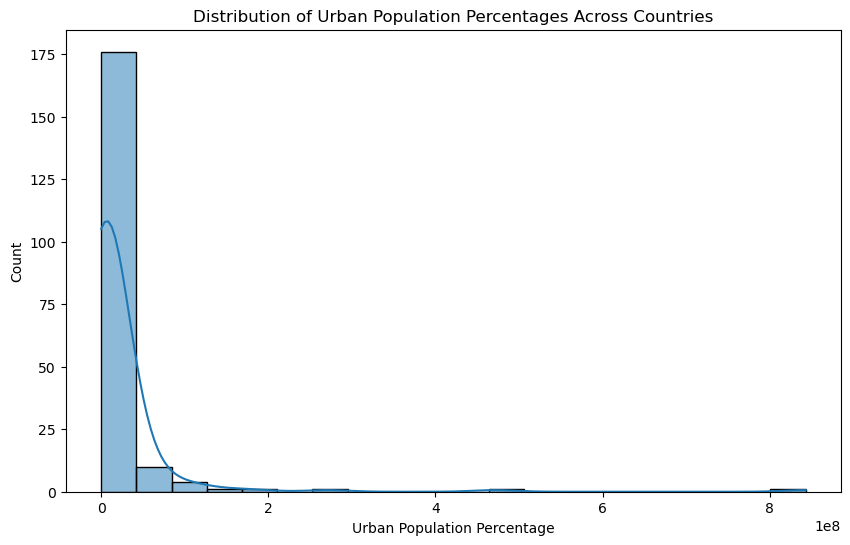

In [94]:
plt.figure(figsize=(10, 6))
sb.histplot(df['Urban_population'],bins=20, kde=True)
plt.title('Distribution of Urban Population Percentages Across Countries')
plt.xlabel('Urban Population Percentage')
plt.show()

### Are there correlations between urban population percentages and GDP or population density?

In [112]:
Corr_Urban_Population=df[['Urban_population','GDP','Density_people_persqkm']].corr()
Corr_Urban_Population

,Urban_population,GDP,Density_people_persqkm
Urban_population,1.000000,0.784580,-0.023715
GDP,0.784580,1.000000,-0.018878
Density_people_persqkm,-0.023715,-0.018878,1.000000


In [95]:
max_urban_population = df.groupby('Country')['Urban_population'].max().nlargest(5)
min_urban_population =  df[df['Urban_population'] != 0].groupby('Country')['Urban_population'].min().nsmallest(5)

print("Top 5 Countries with the Highest Urban Population Percentage:")
print(max_urban_population)

print("\nTop 5 Countries with the Lowest Urban Population Percentage:")
print(min_urban_population)

Top 5 Countries with the Highest Urban Population Percentage:
Country
China            842933962.0
India            471031528.0
United States    270663028.0
Brazil           183241641.0
Indonesia        151509724.0
Name: Urban_population, dtype: float64

Top 5 Countries with the Lowest Urban Population Percentage:
Country
Liechtenstein             5464.0
Tuvalu                    7362.0
Palau                    14491.0
Saint Kitts and Nevis    16269.0
Antigua and Barbuda      23800.0
Name: Urban_population, dtype: float64


### Official Language:

In [96]:
df.Official_language.value_counts()

Official_language
English             31
French              25
Spanish             19
Arabic              18
Portuguese           7
                    ..
Hebrew               1
Jamaican English     1
Lao                  1
Latvian              1
Shona                1
Name: count, Length: 77, dtype: int64

In [98]:
print(df.Official_language.unique())
of = input('Enter Language:')
language = df[df.Official_language == of]
language

['Pashto' 'Albanian' 'Arabic' 'Catalan' 'Portuguese' 'English' 'Spanish'
 'Armenian' 'unknown' 'German' 'Azerbaijani language' 'Bengali' 'Russian'
 'French' 'Dzongkha' 'Bosnian' 'Malay' 'Bulgarian' 'Kirundi'
 'Khmer language' 'Standard Chinese' 'Croatian' 'Greek' 'Czech' 'Danish'
 'Modern Standard Arabic' 'Tigrinya' 'Estonian' 'Amharic' 'Fiji Hindi'
 'Swedish' 'Georgian' 'Italian' 'Hungarian' 'Icelandic' 'Hindi'
 'Indonesian' 'Persian' 'Irish' 'Hebrew' 'Jamaican English' 'Swahili'
 'Lao' 'Latvian' 'Lithuanian' 'Luxembourgish' 'Malaysian language'
 'Divehi' 'Maltese' 'Marshallese' 'Romanian' 'Mongolian'
 'Montenegrin language' 'Burmese' 'Nepali' 'Dutch' 'Korean' 'Macedonian'
 'Norwegian' 'Urdu' 'Tok Pisin' 'Polish' 'Samoan' 'Serbian' 'Slovak'
 'Slovene language' 'Afrikaans' 'Tamil' 'Thai' 'Tongan Language' 'Turkish'
 'Turkmen' 'Tuvaluan Language' 'Ukrainian' 'Uzbek' 'Vietnamese' 'Shona']


Enter Language: Hindi


,Country,Density_people_persqkm,Abbreviation,Agricultural_Land_pct,Land_Area_sqkm,Armed_Forces_size,Birth_Rate,Calling_Code,Capital_Major_City,Co2_Emissions,...,Out_of_pocket_health_expenditure,Physicians_per_thousand,Population,Population_Labor_force_participation_pct,Tax_revenue_pct,Total_tax_rate,Unemployment_rate,Urban_population,Latitude,Longitude
77,India,464.0,IN,60.4,3287263.0,3031000.0,17.86,91.0,New Delhi,2407672.0,...,65.1,0.86,1.366418e+09,49.3,11.2,49.7,5.36,471031528.0,20.593684,78.96288
